In [1]:
import numpy as np  #for numerical computation
import pandas as pd # for data manupulation
import matplotlib.pyplot as plt #for visualization
import seaborn as sns # foe stastical visualization

from sklearn.linear_model import LinearRegression  # for algorithm of model
from sklearn.model_selection import train_test_split  # for data validation
from sklearn.metrics import r2_score  # for evaluation

In [2]:
df=pd.read_csv("C:/PYdataset/laptopData.csv")
print("file read succesfully")

file read succesfully


In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### step1 cleaning duplicate and null values

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True) # because column-> unnamed:0-> is useless

In [5]:
df.duplicated().sum()

58

In [6]:
df = df.drop_duplicates()

In [7]:
df.isnull().sum()

Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [8]:
df.dropna(inplace=True)  # drop missing row

### Step2 one by one converting every relevent columns values into numerical, for further analysis

In [9]:
df["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [10]:
df['Ram'] = pd.to_numeric(df['Ram'].str.replace('GB', ''), errors='coerce')

df["Ram"].unique()

array([ 8, 16,  4,  2, 12, 64,  6, 32, 24,  1], dtype=int64)

In [11]:
df["Weight"].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [12]:
df['Weight'] = pd.to_numeric(df['Weight'].str.replace('kg', ''), errors='coerce')

df["Weight"].unique()

array([1.370e+00, 1.340e+00, 1.860e+00, 1.830e+00, 2.100e+00, 2.040e+00,
       1.300e+00, 1.600e+00, 2.200e+00, 9.200e-01, 1.220e+00, 2.500e+00,
       1.620e+00, 1.910e+00, 2.300e+00, 1.350e+00, 1.880e+00, 1.890e+00,
       1.650e+00, 2.710e+00, 1.200e+00, 1.440e+00, 2.800e+00, 2.000e+00,
       2.650e+00, 2.770e+00, 3.200e+00, 1.490e+00, 2.400e+00, 2.130e+00,
       2.430e+00, 1.700e+00, 1.400e+00, 1.800e+00, 1.900e+00, 3.000e+00,
       1.252e+00, 2.700e+00, 2.020e+00, 1.630e+00, 1.960e+00, 1.210e+00,
       2.450e+00, 1.250e+00, 1.500e+00, 2.620e+00, 1.380e+00, 1.580e+00,
       1.850e+00, 1.230e+00, 2.160e+00, 2.360e+00, 7.200e+00, 2.050e+00,
       1.320e+00, 1.750e+00, 9.700e-01, 2.560e+00, 1.480e+00, 1.740e+00,
       1.100e+00, 1.560e+00, 2.030e+00, 1.050e+00, 5.400e+00, 4.400e+00,
       1.290e+00, 1.950e+00, 2.060e+00, 1.120e+00, 3.490e+00, 3.350e+00,
       2.230e+00,       nan, 2.900e+00, 4.420e+00, 2.690e+00, 2.370e+00,
       4.700e+00, 3.600e+00, 2.080e+00, 4.300e+00, 

In [13]:
df = df.dropna(subset=['Weight']) #to remove the nan value


In [14]:
df["Weight"].unique()

array([1.370e+00, 1.340e+00, 1.860e+00, 1.830e+00, 2.100e+00, 2.040e+00,
       1.300e+00, 1.600e+00, 2.200e+00, 9.200e-01, 1.220e+00, 2.500e+00,
       1.620e+00, 1.910e+00, 2.300e+00, 1.350e+00, 1.880e+00, 1.890e+00,
       1.650e+00, 2.710e+00, 1.200e+00, 1.440e+00, 2.800e+00, 2.000e+00,
       2.650e+00, 2.770e+00, 3.200e+00, 1.490e+00, 2.400e+00, 2.130e+00,
       2.430e+00, 1.700e+00, 1.400e+00, 1.800e+00, 1.900e+00, 3.000e+00,
       1.252e+00, 2.700e+00, 2.020e+00, 1.630e+00, 1.960e+00, 1.210e+00,
       2.450e+00, 1.250e+00, 1.500e+00, 2.620e+00, 1.380e+00, 1.580e+00,
       1.850e+00, 1.230e+00, 2.160e+00, 2.360e+00, 7.200e+00, 2.050e+00,
       1.320e+00, 1.750e+00, 9.700e-01, 2.560e+00, 1.480e+00, 1.740e+00,
       1.100e+00, 1.560e+00, 2.030e+00, 1.050e+00, 5.400e+00, 4.400e+00,
       1.290e+00, 1.950e+00, 2.060e+00, 1.120e+00, 3.490e+00, 3.350e+00,
       2.230e+00, 2.900e+00, 4.420e+00, 2.690e+00, 2.370e+00, 4.700e+00,
       3.600e+00, 2.080e+00, 4.300e+00, 1.680e+00, 

In [15]:
df["ScreenResolution"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

### Extracting width and height and calculating TotalPixel

In [16]:
df['ScreenWidth'] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')[0].astype(float)  #extract width 
df['ScreenHeight'] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')[1].astype(float) #extract height

df['TotalPixels'] = df['ScreenWidth'] * df['ScreenHeight']


In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWidth,ScreenHeight,TotalPixels
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560.0,1600.0,4096000.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440.0,900.0,1296000.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920.0,1080.0,2073600.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880.0,1800.0,5184000.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560.0,1600.0,4096000.0


In [18]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWidth,ScreenHeight,TotalPixels
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560.0,1600.0,4096000.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440.0,900.0,1296000.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920.0,1080.0,2073600.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880.0,1800.0,5184000.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560.0,1600.0,4096000.0


In [19]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [20]:
import re
import pandas as pd

def clean_memory(mem):
    try:
        mem = str(mem).replace('Flash Storage', 'Flash')
        mem = mem.replace(' ', '').upper()

        ssd = hdd = hybrid = flash = 0

        parts = mem.split('+')

        for part in parts:
            size_match = re.findall(r'\d+\.?\d*', part)
            if not size_match:
                continue

            size = float(size_match[0])
            if 'TB' in part:
                size *= 1024  # Convert TB to GB

            if 'SSD' in part:
                ssd += size
            elif 'HDD' in part:
                hdd += size
            elif 'HYBRID' in part:
                hybrid += size
            elif 'FLASH' in part:
                flash += size

        return pd.Series([ssd, hdd, hybrid, flash])
    except:
        return pd.Series([0, 0, 0, 0])

# Apply the function directly to the column
df[['SSD', 'HDD', 'Hybrid', 'Flash']] = df['Memory'].apply(clean_memory)



In [21]:
df['TotalMemory'] = df['SSD'] + df['HDD'] + df['Hybrid'] + df['Flash']



In [22]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWidth,ScreenHeight,TotalPixels,SSD,HDD,Hybrid,Flash,TotalMemory
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560.0,1600.0,4096000.0,128.0,0.0,0.0,0.0,128.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440.0,900.0,1296000.0,0.0,0.0,0.0,128.0,128.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920.0,1080.0,2073600.0,256.0,0.0,0.0,0.0,256.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880.0,1800.0,5184000.0,512.0,0.0,0.0,0.0,512.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560.0,1600.0,4096000.0,256.0,0.0,0.0,0.0,256.0


In [23]:
import pandas as pd
import numpy as np
import re

# Function to convert TB and GB to GB
def convert_to_gb(text):
    num = float(re.search(r'\d+\.?\d*', text).group())
    if 'TB' in text:
        return int(num * 1024)
    elif 'GB' in text:
        return int(num)
    return 0

# Initialize columns
df['SSD'] = 0
df['HDD'] = 0
df['FlashStorage'] = 0
df['Hybrid'] = 0

# Fill values based on 'Memory' column
for i, row in df.iterrows():
    mem_str = row['Memory']
    for part in mem_str.split('+'):
        part = part.strip()
        if 'SSD' in part and 'Flash' not in part:
            df.at[i, 'SSD'] += convert_to_gb(part)
        elif 'HDD' in part:
            df.at[i, 'HDD'] += convert_to_gb(part)
        elif 'Flash Storage' in part:
            df.at[i, 'FlashStorage'] += convert_to_gb(part)
        elif 'Hybrid' in part:
            df.at[i, 'Hybrid'] += convert_to_gb(part)

# Drop original column if needed
# df.drop(columns=['Memory'], inplace=True)


In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWidth,ScreenHeight,TotalPixels,SSD,HDD,Hybrid,Flash,TotalMemory,FlashStorage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560.0,1600.0,4096000.0,128,0,0,0.0,128.0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440.0,900.0,1296000.0,0,0,0,128.0,128.0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920.0,1080.0,2073600.0,256,0,0,0.0,256.0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880.0,1800.0,5184000.0,512,0,0,0.0,512.0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560.0,1600.0,4096000.0,256,0,0,0.0,256.0,0


In [25]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [26]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

In [27]:
import pandas as pd
import re

# Mapping of CPU keywords to type
cpu_type_map = {
    'intel core i9': 'i9',
    'intel core i7': 'i7',
    'intel core i5': 'i5',
    'intel core i3': 'i3',
    'intel pentium': 'pentium',
    'intel celeron': 'celeron',
    'intel xeon': 'xeon',
    'amd ryzen 7': 'ryzen7',
    'amd ryzen 5': 'ryzen5',
    'amd ryzen 3': 'ryzen3',
    'amd a12': 'a12',
    'amd a9': 'a9',
    'amd a6': 'a6',
}

# CPU performance tiers (numerical)
cpu_tier_map = {
    'i9': 3,
    'ryzen7': 3,
    'xeon': 3,
    'i7': 2,
    'ryzen5': 2,
    'i5': 2,
    'ryzen3': 2,
    'a12': 2,
    'i3': 1,
    'a6': 1,
    'pentium': 1,
    'celeron': 0,
    'a9': 0,
    'other': 1  # default
}

def extract_cpu_features(cpu_str):
    cpu_lower = cpu_str.lower()
    cpu_type = 'other'
    for key in cpu_type_map:
        if key in cpu_lower:
            cpu_type = cpu_type_map[key]
            break

    # Extract GHz value
    match = re.search(r'(\d+\.?\d*)ghz', cpu_lower)
    ghz = float(match.group(1)) if match else None

    # Assign tier
    tier = cpu_tier_map.get(cpu_type, 1)
    return pd.Series([cpu_type, ghz, tier])

# Apply to DataFrame
df[['CpuType', 'CpuSpeedGHz', 'CpuTier']] = df['Cpu'].apply(extract_cpu_features)



In [28]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,TotalPixels,SSD,HDD,Hybrid,Flash,TotalMemory,FlashStorage,CpuType,CpuSpeedGHz,CpuTier
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,...,1049088.0,0,500,0,0.0,500.0,0,i7,2.5,2
1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,...,2073600.0,128,0,0,0.0,128.0,0,i7,2.5,2
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,...,5760000.0,512,0,0,0.0,512.0,0,i7,2.5,2
1272,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,...,1049088.0,0,0,0,64.0,64.0,64,celeron,1.6,0
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,...,1049088.0,0,1024,0,0.0,1024.0,0,i7,2.5,2


In [29]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [30]:
import pandas as pd
import re

# GPU simplification map
gpu_type_map = {
    'gtx 1080': 'gtx 1080',
    'gtx 1070': 'gtx 1070',
    'gtx 1070m': 'gtx 1070m',
    'gtx 1060': 'gtx 1060',
    'gtx1060': 'gtx 1060',
    'gtx 1050 ti': 'gtx 1050 ti',
    'gtx 1050ti': 'gtx 1050 ti',
    'gtx 1050': 'gtx 1050',
    'gtx 1050m': 'gtx 1050',
    'gtx 980': 'gtx 980',
    'gtx 970': 'gtx 970',
    'gtx 965m': 'gtx 965m',
    'gtx 960m': 'gtx 960m',
    'gtx 950m': 'gtx 950m',
    'gtx 940mx': 'gtx 940mx',
    'gtx 930mx': 'gtx 930mx',
    'gtx 920mx': 'gtx 920mx',
    'mx150': 'mx150',
    'mx130': 'mx130',
    '940mx': '940mx',
    '930mx': '930mx',
    '920mx': '920mx',
    '920m': '920m',
    '930m': '930m',
    '940m': '940m',
    'quadro m3000m': 'quadro m3000m',
    'quadro m2200': 'quadro m2200',
    'quadro m2200m': 'quadro m2200',
    'quadro m1200': 'quadro m1200',
    'quadro m1000m': 'quadro m1000m',
    'quadro m620m': 'quadro m620m',
    'quadro m620': 'quadro m620',
    'quadro m520m': 'quadro m520m',
    'quadro m2000m': 'quadro m2000m',
    'quadro 3000m': 'quadro m3000m',
    'firepro': 'firepro',
    'radeon rx 580': 'rx 580',
    'radeon rx 560': 'rx 560',
    'radeon rx 550': 'rx 550',
    'radeon rx 540': 'rx 540',
    'radeon 540': 'radeon 540',
    'radeon 530': 'radeon 530',
    'radeon 520': 'radeon 520',
    'radeon r9': 'radeon r9',
    'radeon r7': 'radeon r7',
    'radeon r5': 'radeon r5',
    'radeon r4': 'radeon r4',
    'radeon r3': 'radeon r3',
    'radeon r2': 'radeon r2',
    'r5 m330': 'radeon r5',
    'r5 m315': 'radeon r5',
    'r5 m420': 'radeon r5',
    'r5 m430': 'radeon r5',
    'r5 430': 'radeon r5',
    'r5 520': 'radeon r5',
    'r5 m420x': 'radeon r5',
    'r7 m360': 'radeon r7',
    'r7 m365x': 'radeon r7',
    'r7 m440': 'radeon r7',
    'r7 m445': 'radeon r7',
    'r7 m460': 'radeon r7',
    'r7 m465': 'radeon r7',
    'r7 graphics': 'radeon r7',
    'r4 graphics': 'radeon r4',
    'r2 graphics': 'radeon r2',
    'r3': 'radeon r3',
    'mali': 'mali',
    'intel uhd': 'intel uhd',
    'intel iris': 'intel iris',
    'intel hd': 'intel hd',
    'intel graphics 620': 'intel hd',
}

# GPU performance tiers
gpu_tier_map = {
    # High-end
    'gtx 1080': 3, 'gtx 1070': 3, 'gtx 1070m': 3, 'gtx 1060': 3,
    'gtx 980': 3, 'gtx 970': 3, 'quadro m3000m': 3, 'rx 580': 3,

    # Mid-range
    'gtx 1050 ti': 2, 'gtx 1050': 2, 'gtx 965m': 2, 'gtx 960m': 2,
    'quadro m2200': 2, 'quadro m1200': 2, 'firepro': 2,
    'rx 560': 2, 'rx 550': 2, 'rx 540': 2, 'radeon 540': 2, 'radeon r9': 2,

    # Entry-level dedicated
    'gtx 950m': 1, 'gtx 940mx': 1, 'gtx 930mx': 1, 'mx150': 1, 'mx130': 1,
    'quadro m1000m': 1, 'quadro m620': 1, 'quadro m620m': 1,
    'radeon 530': 1, 'radeon 520': 1, 'radeon r7': 1,
    'radeon r5': 1, 'radeon r4': 1, '940m': 1, '930m': 1, '920m': 1,

    # Low-end/integrated
    'intel hd': 0, 'intel uhd': 0, 'intel iris': 0,
    'radeon r3': 0, 'radeon r2': 0, 'mali': 0,

    # fallback
    'other': 0
}

def extract_gpu_features(gpu_str):
    if pd.isna(gpu_str):
        return pd.Series(['other', 0])

    gpu_lower = gpu_str.lower()
    gpu_type = 'other'
    for key in gpu_type_map:
        if key in gpu_lower:
            gpu_type = gpu_type_map[key]
            break

    tier = gpu_tier_map.get(gpu_type, 0)
    return pd.Series([gpu_type, tier])

# Example usage (assuming 'Gpu' column exists):
df[['GpuType', 'GpuTier']] = df['Gpu'].apply(extract_gpu_features)


In [31]:
df.tail(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,HDD,Hybrid,Flash,TotalMemory,FlashStorage,CpuType,CpuSpeedGHz,CpuTier,GpuType,GpuTier
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,...,1024,0,0.0,1024.0,0,i7,2.5,2,radeon r5,1


In [32]:
df['GpuTier'].unique()

array([0, 1, 2, 3], dtype=int64)

In [33]:
df = df[df['Inches'] != '?']    #Remove rows with which cointains -->"?"

df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')

df["Inches"].unique()


array([13.3, 15.6, 15.4, 14. , 12. , 17.3, 13.5, 12.5, 13. , 18.4, 13.9,
       11.6, 25.6, 35.6, 12.3, 27.3, 24. , 33.5, 31.6, 17. , 15. , 14.1,
       11.3, 10.1])

### Constructing the correlation matrix to understand the relationship between columns

### correlation matrix indicating that there is no specific strong relationship against "Price" just Ram

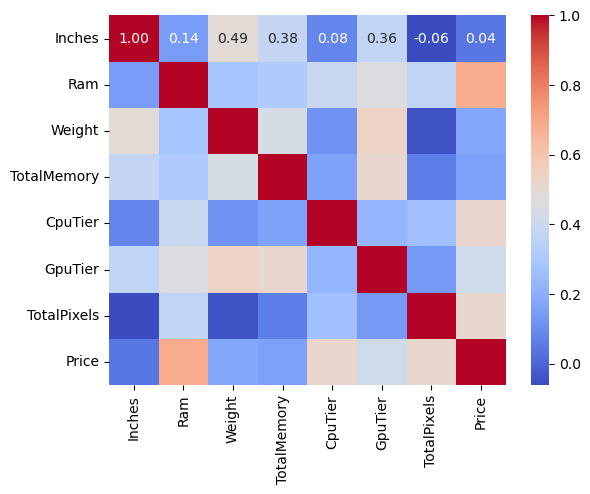

In [34]:
selected = ['Inches', 'Ram', 'Weight','TotalMemory','CpuTier','GpuTier','TotalPixels','Price']
corr_mat = df[selected].corr()

sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


#### Feature Selection
#### Selecting 'Inches', 'Ram', 'Weight','TotalMemory','CpuTier','GpuTier','TotalPixels' as Feature to increase accuracy

In [35]:
x = df[['Inches', 'Ram', 'Weight','TotalMemory','CpuTier','GpuTier','TotalPixels']]
y = df['Price']
print(type(x))

<class 'pandas.core.frame.DataFrame'>


#### Data Division into Training-Teasting

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Model Preperation

In [37]:
model=LinearRegression() #model preperation

#### Model Fitting/Training

In [38]:
model.fit(x_train,y_train) #model training with labelled data

LinearRegression()

#### Model Evaluation by testing data prediction

In [39]:
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("The r2 score of this model=",r2)

The r2 score of this model= 0.5779249114880505


#### User Prediction from model

In [ ]:
# User input
inch = float(input("Enter the size of the screen (inches): "))
ram = float(input("Enter the RAM (GB): "))
weight = float(input("Enter the weight (kg): "))
total_memory = float(input("Enter the total memory (GB): "))
cpu_tier = int(input("Enter the CPU tier (e.g., 1, 2, 3): "))
gpu_tier = int(input("Enter the GPU tier (e.g., 1, 2, 3): "))
total_pixels = int(input("Enter the total number of pixels (e.g., 1920*1080 = 2073600): "))

# Prediction
pred_price = model.predict([[inch, ram, weight, total_memory, cpu_tier, gpu_tier, total_pixels]])
print(f"Predicted Price for {inch}\" screen and {ram}GB RAM is ₹{pred_price[0]:.2f}")
